In [39]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as pyp
import csv
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

In [40]:
A=np.loadtxt('tf14TV.txt')

time=A[:,0];
amp=A[:,1];


#parseval_sx = np.sum(amp**2*dt)

#print(parseval_sx)

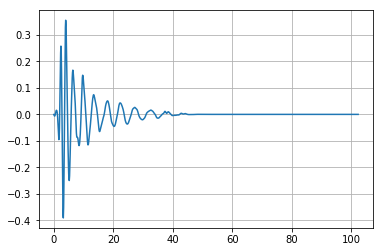

In [41]:
plt.plot(time,amp)
plt.grid(True)

0.264921422997


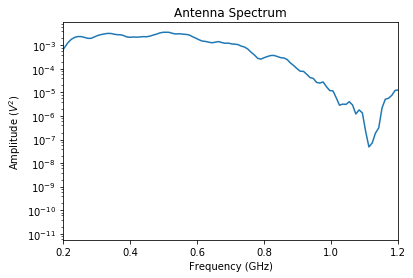

In [42]:
N=len(time);
dt=time[1]-time[0]

f = fft.fft(amp)
fshift = fft.fftshift(f)


freq = fft.fftfreq(N, dt)

plt.semilogy(fft.fftshift(freq), abs(fshift*fshift)/N*dt)
plt.xlim(0.2,1.2)

parseval_fx = np.sum(np.abs(fshift)**2/N*dt)
print(parseval_fx)


plt.title('Antenna Spectrum')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Amplitude ($V^2$)')

In [43]:
# Create Time Domain Signal for 1 sec
fs = n = 10000    # Samplingfrequency
ti = np.arange(0,1,1./fs)
sx = np.sin(ti*2*np.pi*100.)    

# Calculate spectrum via FFT and account for scaling 1/sqrt(N)
# taking the real fft (rfft) only the positive frequencies are calculated
fx = np.sqrt(2)*np.fft.rfft(sx)/((len(sx))**0.5)

# Calculatenp. RMS for time domains signal + spectrum
parseval_sx = np.sum(sx**2)
parseval_fx = np.sum(np.abs(fx)**2)

print(parseval_sx, " equals ", parseval_fx)

5000.0  equals  5000.0


[-5.         -4.99023438 -4.98046875 ...,  4.97070312  4.98046875
  4.99023438]


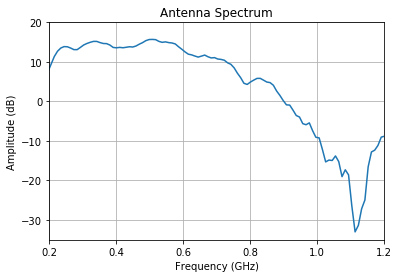

In [44]:
N=len(time);
dt=time[1]-time[0]

f = fft.fft(amp)
fshift = fft.fftshift(f)


freq = fft.fftfreq(N, dt)

dB=10*np.log10(abs(fshift*fshift))

plt.plot(fft.fftshift(freq), dB)
plt.xlim(0,1.2)

#print(fft.fftshift(freq).tolist().index(0.205078125))
#for i in range(len(fft.fftshift(freq))):
 #   print(fft.fftshift(freq)[i])

plt.title('Antenna Spectrum')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Amplitude (dB)')
plt.xlim(0.2,1.2)
plt.ylim(-35,20)
plt.grid(True)
print(fft.fftshift(freq))

In [45]:
B=np.loadtxt('HportEplane_700MHz.txt',delimiter=',')

Gain_time=B[:,0];
Gain_amp=B[:,1];

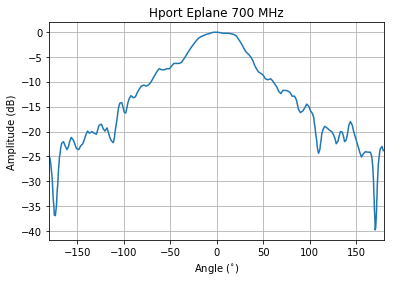

In [46]:
plt.plot(Gain_time,Gain_amp)
plt.title('Hport Eplane 700 MHz')
plt.xlabel('Angle ($^{\circ}$)')
plt.xlim(-180,180)
plt.grid(True)
plt.ylabel('Amplitude (dB)')

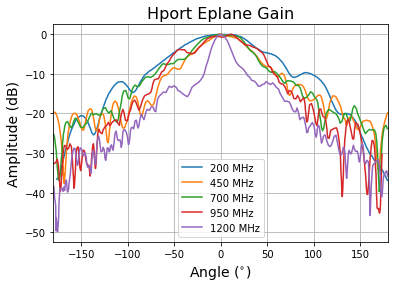

In [47]:
names=['HportEplane_200MHz.txt','HportEplane_450MHz.txt','HportEplane_700MHz.txt','HportEplane_950MHz.txt','HportEplane_1200MHz.txt']
labels=['200 MHz','450 MHz','700 MHz','950 MHz','1200 MHz',]
for i in range(len(names)):
    
    B=np.loadtxt(names[i],delimiter=',')

    Gain_time=B[:,0];
    Gain_amp=B[:,1];


    plt.plot(Gain_time,Gain_amp,label=labels[i])
    plt.title('Hport Eplane Gain',fontsize=16)
    plt.xlabel('Angle ($^{\circ}$)',fontsize=14)
    plt.xlim(-180,180)
    plt.legend(loc='best')
    plt.grid(True)
    plt.ylabel('Amplitude (dB)',fontsize=14)

In [48]:
print(Gain_time)

[-179.434    -179.15     -178.867    -178.584    -178.017    -177.451
 -177.168    -177.168    -176.884    -176.884    -175.468    -174.902
 -174.618    -174.335    -174.052    -173.769    -173.769    -173.485
 -173.202    -172.919    -171.503    -170.087    -169.52     -168.67
 -167.821    -167.537    -166.971    -166.121    -165.555    -165.271
 -164.705    -163.572    -163.289    -162.722    -162.156    -161.589
 -161.306    -160.74     -160.456    -159.89     -159.04     -157.907
 -156.491    -155.924    -155.358    -154.792    -154.225    -153.375
 -152.809    -152.526    -151.959    -151.109    -149.41     -148.843
 -147.71     -146.011    -144.878    -144.312    -144.028    -142.895
 -141.479    -140.346    -139.78     -139.213    -138.93     -138.647
 -138.363    -137.797    -136.947    -136.098    -135.531    -135.248
 -134.398    -134.115    -133.832    -133.548    -133.265    -132.982
 -132.415    -131.282    -130.433    -129.866    -129.3      -128.733
 -127.317    -126.467

In [49]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

value = 170

print(find_nearest(Gain_time, value))

170.087


In [50]:
A=np.arange(-180,190,10);

print(A)

[-180 -170 -160 -150 -140 -130 -120 -110 -100  -90  -80  -70  -60  -50  -40
  -30  -20  -10    0   10   20   30   40   50   60   70   80   90  100  110
  120  130  140  150  160  170  180]


In [51]:
meg_700=[];

B=np.loadtxt('HportEplane_700MHz.txt',delimiter=',')

Gain_time=B[:,0];
Gain_amp=B[:,1];



A=np.arange(-180,190,10);

for i in range(len(A)):
    approx=find_nearest(Gain_time, A[i])
    approx_index=Gain_time.tolist().index(approx)
    meg_700.append(Gain_amp[approx_index])
    


In [52]:
meg_200=[];

B=np.loadtxt('HportEplane_200MHz.txt',delimiter=',')

Gain_time=B[:,0];
Gain_amp=B[:,1];



A=np.arange(-180,190,10);

for i in range(len(A)):
    approx=find_nearest(Gain_time, A[i])
    approx_index=Gain_time.tolist().index(approx)
    meg_200.append(Gain_amp[approx_index])
    


In [53]:
meg_450=[];

B=np.loadtxt('HportEplane_450MHz.txt',delimiter=',')

Gain_time=B[:,0];
Gain_amp=B[:,1];



A=np.arange(-180,190,10);

for i in range(len(A)):
    approx=find_nearest(Gain_time, A[i])
    approx_index=Gain_time.tolist().index(approx)
    meg_450.append(Gain_amp[approx_index])
    


In [54]:
meg_950=[];

B=np.loadtxt('HportEplane_950MHz.txt',delimiter=',')

Gain_time=B[:,0];
Gain_amp=B[:,1];



A=np.arange(-180,190,10);

for i in range(len(A)):
    approx=find_nearest(Gain_time, A[i])
    approx_index=Gain_time.tolist().index(approx)
    meg_950.append(Gain_amp[approx_index])
    


In [55]:
meg_1200=[];

B=np.loadtxt('HportEplane_1200MHz.txt',delimiter=',')

Gain_time=B[:,0];
Gain_amp=B[:,1];



A=np.arange(-180,190,10);

for i in range(len(A)):
    approx=find_nearest(Gain_time, A[i])
    approx_index=Gain_time.tolist().index(approx)
    meg_1200.append(Gain_amp[approx_index])
    
print(len(meg_1200))

37


In [56]:
A=[200,450,700,950,1200]

angle_minus_90=[-13.5115,-16.4122,-13.2415,-18.3263,-22.7273
]
angle_minus_80=[-10,-17.0229,-10.911,-15.2542,-19.556
]
angle_minus_70=[-8.01527,-15.7252,-10.0636,-11.3347,-19.556
]
angle_minus_60=[-6.41221,-10.458,-7.62712,-8.26271,-14.6934
]

angle_minus_50=[-4.50382,-8.47328,-7.41525,-4.76695,-13.0021
]
angle_minus_40=[-2.90076,-7.48092,-6.35593,-3.91949,-15.0106
]
angle_minus_30=[-1.67939,-4.80916,-3.60169,-4.87288,-13.4249
]
angle_minus_20=[-0.763359,-2.74809,-1.27119,-2.33051,-10.6765
]
angle_minus_10=[-0.152672,-1.0687,-0.529661,-0.635593,-4.01691
]
angle_0=[0,0,-0.105932,-0.635593,-0.105708
]
angle_10=[-0.0763359,-0.610687,-0.317797,1.77636E-15,-3.17125
]
angle_20=[-0.534351,-1.37405,-0.847458,-1.69492,-8.03383
]
angle_30=[-1.98473,-3.58779,-3.49576,-2.75424,-10.4651
]
angle_40=[-3.66412,-6.03053,-6.67373,-3.70763,-13.1078
]
angle_50=[-4.73282,-8.16794,-8.79237,-7.09746,-12.3679
]
angle_60=[-5.64885,-10.6107,-9.85169,-10.3814,-13.4249
]
angle_70=[-8.32061,-11.374,-12.3941,-14.1949,-16.9133
]
angle_80=[-10.7634,-12.8244,-12.1822,-16.3136,-19.556
]
angle_90=[-9.69466,-13.5878,-16.2076,-16.9492,-21.7759
]

#plt.plot(A,angle_minus_70,'.')
   
g = interp1d(A, angle_minus_70)

fnew=np.linspace(200,1200,50)
    
#plt.plot(fnew,g(fnew))
#plt.title('-80')
    


In [57]:
f=[.200,.450,.700,.950,1.200]
A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']
for i in range(len(A)):
    #plt.figure(i)
    #plt.plot(f,A[i],'.')
   
    g = interp1d(f, A[i])

    fnew=np.linspace(.200,1.200,50)
    #plt.title('Angle: '+name[i]+'$^{\circ}$')
    #plt.plot(fnew,g(fnew))
    #plt.ylabel('Loss (dB)')
    #plt.xlabel('Frequency (GHz)')
    #plt.xlim(0.2,1.2)
    

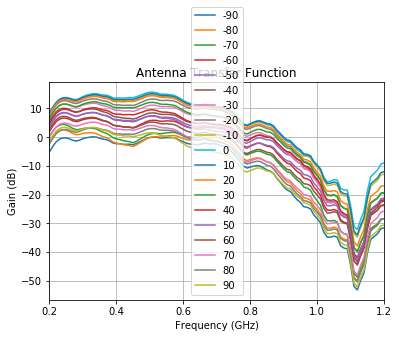

In [58]:
#N=len(time);
#dt=time[1]-time[0]

#f = fft.fft(amp)
#fshift = fft.fftshift(f)


freq = fft.fftfreq(N, dt)

dB=10*np.log10(abs(fshift*fshift))


ant_func= interp1d(fft.fftshift(freq)[532:636], dB[532:636])

fnew=np.linspace(.20,1.200,101)

dB=ant_func(fnew)


f=[.200,.450,.700,.950,1.200]
#A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
#name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']

A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']


for i in range(len(A)):
    #plt.figure(i)
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,101)
    
    Hloss=dB+g(fnew)

    plt.plot(fnew,Hloss,label=name[i])
    
    
    
    plt.title('Antenna Transfer Function')
    plt.ylabel('Gain (dB)')
    plt.xlabel('Frequency (GHz)')
    plt.xlim(0.2,1.2)
    plt.legend(loc='best')
    plt.grid(True)
#plt.figure(2)
#plt.plot(fnew,dB[533:634])


#print(fnew)
#print(len(fnew))

#print(fft.fftshift(freq)[533:634])
#print(len(fft.fftshift(freq)[533:634]))




101 101


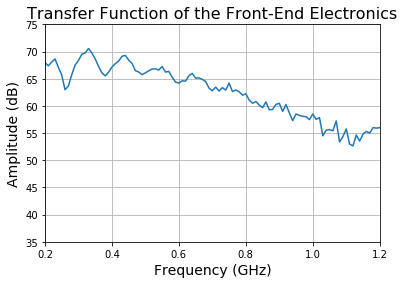

In [59]:
Ant=np.loadtxt('AntennaTransfer.txt') 
ant_freq=Ant[:,0] 
ant_amp=Ant[:,1]



elec_func= interp1d(ant_freq,ant_amp)

fnew=np.linspace(.20,1.200,101)

elecdB=elec_func(fnew)

plt.plot(fnew,elecdB)
plt.xlim(0.2,1.2)
plt.ylim(35,75)
print(len(fnew),len(elecdB))

plt.title('Transfer Function of the Front-End Electronics',fontsize=16)
plt.xlabel('Frequency (GHz)',fontsize=14)
plt.ylabel('Amplitude (dB)',fontsize=14)

plt.grid(True)

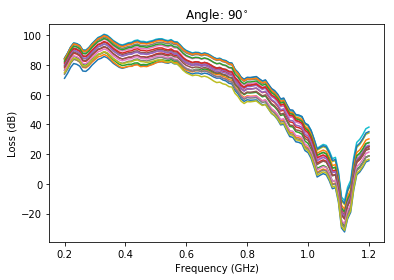

In [60]:
Ant=np.loadtxt('AntennaTransfer.txt') 
ant_freq=Ant[:,0] 
ant_amp=Ant[:,1]



elec_func= interp1d(ant_freq,ant_amp)

fnew=np.linspace(.20,1.200,101)

elecdB=elec_func(fnew)

#plt.plot(fnew,elecdB)






freq = fft.fftfreq(N, dt)

dB=20*np.log10(abs(fshift*fshift))




ant_func= interp1d(fft.fftshift(freq)[531:637], dB[531:637])

fnew=np.linspace(.20,1.200,101)

dB=ant_func(fnew)


f=[.200,.450,.700,.950,1.200]
A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']

for i in range(len(A)):
    #plt.figure(i)
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,101)
    
    Hloss=dB+g(fnew)
    
    Final_Transfer=[]
    
    for j in range(len(Hloss)):
        Final_Transfer.append(Hloss[j]+elecdB[j])

    plt.plot(fnew,Final_Transfer)
    

    
    plt.title('Angle: '+name[i]+'$^{\circ}$')
    plt.ylabel('Loss (dB)')
    plt.xlabel('Frequency (GHz)')





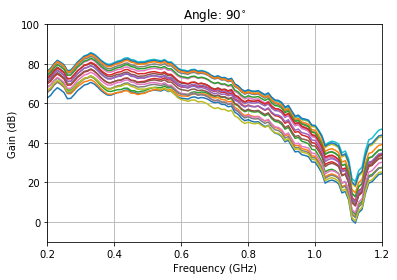

In [61]:
Ant=np.loadtxt('AntennaTransfer.txt') 
ant_freq=Ant[:,0] 
ant_amp=Ant[:,1]



elec_func= interp1d(ant_freq,ant_amp)

fnew=np.linspace(.20,1.200,101)

elecdB=elec_func(fnew)

#plt.plot(fnew,elecdB)






freq = fft.fftfreq(N, dt)

dB=10*np.log10(abs(fshift*fshift))


ant_func= interp1d(fft.fftshift(freq)[532:636], dB[532:636])

fnew=np.linspace(.20,1.200,101)

dB=ant_func(fnew)




f=[.200,.450,.700,.950,1.200]
A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']

for i in range(len(A)):
    #plt.figure(i)
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,101)
    
    Hloss=dB+g(fnew)
    
    Final_Transfer=[]
    
    for j in range(len(Hloss)):
        Final_Transfer.append(Hloss[j]+elecdB[j])

    plt.plot(fnew,Final_Transfer)
    
    plt.grid(True)
    plt.ylim(-10,100) 
    plt.xlim(0.2,1.2)
    plt.title('Angle: '+name[i]+'$^{\circ}$')
    plt.ylabel('Gain (dB)')
    plt.xlabel('Frequency (GHz)')
    plt.savefig('Angle: '+name[i]+'$^{\circ}$', dpi=150)

filenames=['Angle: -90$^{\circ}$.png','Angle: -80$^{\circ}$.png','Angle: -70$^{\circ}$.png','Angle: -60$^{\circ}$.png','Angle: -50$^{\circ}$.png','Angle: -40$^{\circ}$.png','Angle: -30$^{\circ}$.png','Angle: -20$^{\circ}$.png','Angle: -10$^{\circ}$.png','Angle: 0$^{\circ}$.png','Angle: 10$^{\circ}$.png','Angle: 20$^{\circ}$.png','Angle: 30$^{\circ}$.png','Angle: 40$^{\circ}$.png','Angle: 50$^{\circ}$.png','Angle: 60$^{\circ}$.png','Angle: 70$^{\circ}$.png','Angle: 80$^{\circ}$.png','Angle: 90$^{\circ}$.png']

import imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('Transfers.gif', images,fps=1)

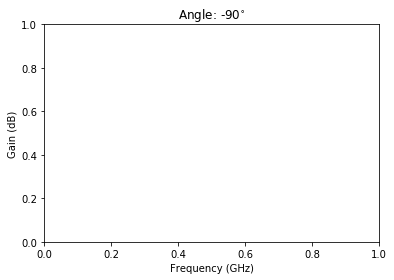

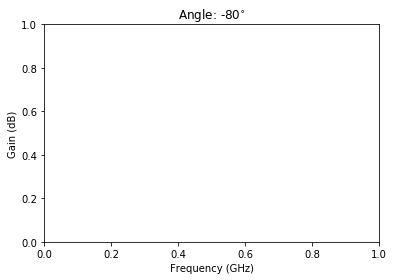

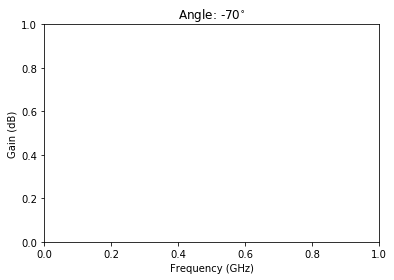

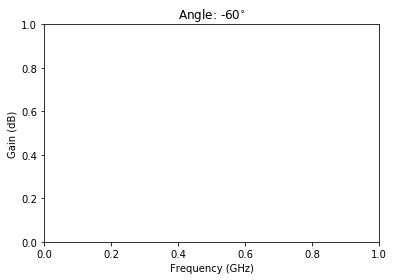

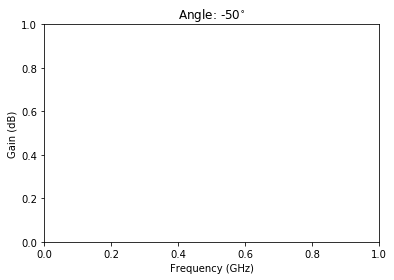

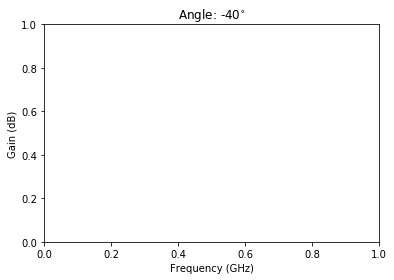

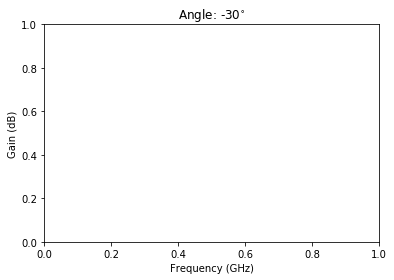

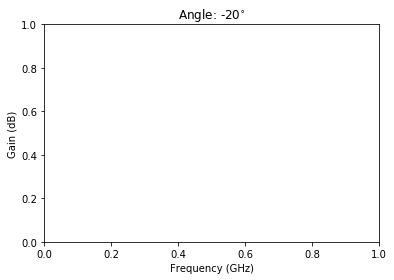

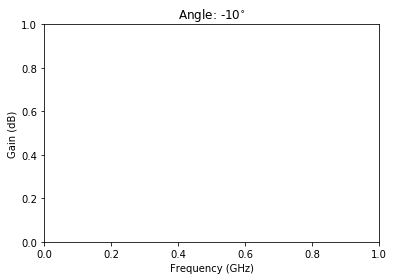

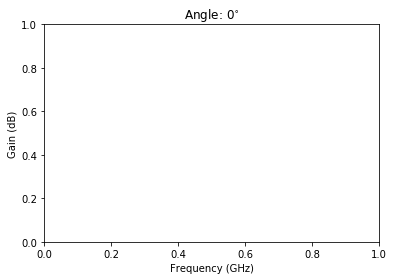

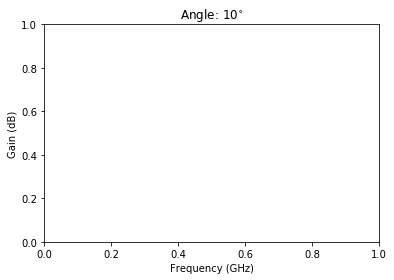

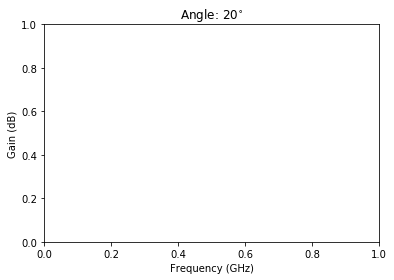

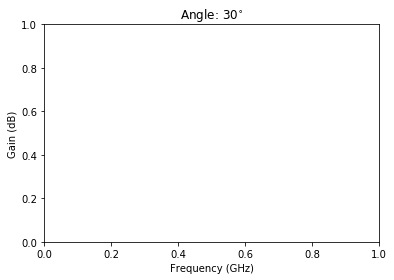

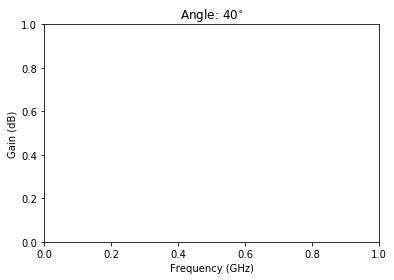

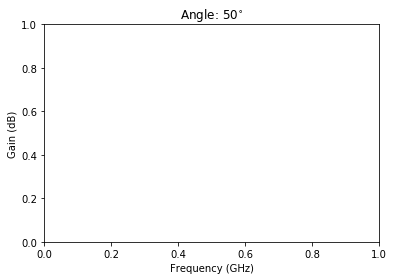

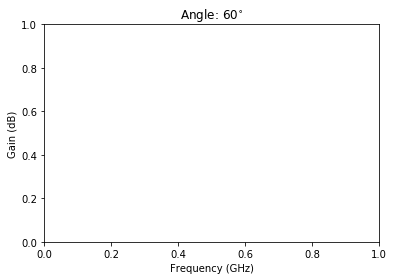

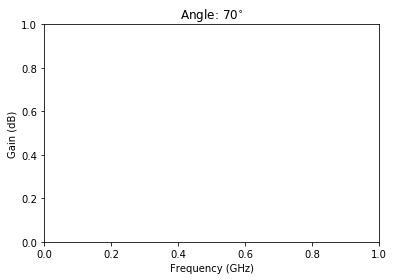

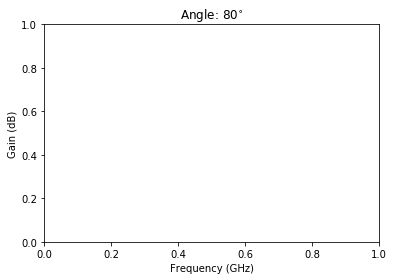

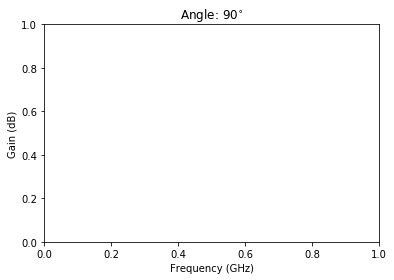

In [62]:
Elec=np.loadtxt('AntennaTransfer.txt') 
elec_freq=Elec[:,0] 
elec_amp=Elec[:,1]



elec_func= interp1d(ant_freq,ant_amp)

fnew=np.linspace(.20,1.200,101)

elecdB=elec_func(fnew)

#plt.plot(fnew,elecdB)






freq = fft.fftfreq(N, dt)

dB=20*np.log10(abs(fshift*fshift))


ant_func= interp1d(fft.fftshift(freq)[532:636], dB[532:636])

fnew=np.linspace(.20,1.200,101)

dB=ant_func(fnew)


f=[.200,.450,.700,.950,1.200]
A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']

for i in range(len(A)):
    plt.figure(i)
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,101)
    
    Hloss=dB+g(fnew)
    
    Final_Transfer=[]
    
    for j in range(len(Hloss)):
        Final_Transfer.append(Hloss[j]+elecdB[j])

    #plt.plot(fnew,Final_Transfer)
    

    #plt.ylim(-35,105) 
    #plt.xlim(0.2,1.2)
    plt.title('Angle: '+name[i]+'$^{\circ}$')
    plt.ylabel('Gain (dB)')
    plt.xlabel('Frequency (GHz)')
    plt.savefig('Angle: '+name[i]+'$^{\circ}$', dpi=150)

filenames=['Angle: -90$^{\circ}$.png','Angle: -80$^{\circ}$.png','Angle: -70$^{\circ}$.png','Angle: -60$^{\circ}$.png','Angle: -50$^{\circ}$.png','Angle: -40$^{\circ}$.png','Angle: -30$^{\circ}$.png','Angle: -20$^{\circ}$.png','Angle: -10$^{\circ}$.png','Angle: 0$^{\circ}$.png','Angle: 10$^{\circ}$.png','Angle: 20$^{\circ}$.png','Angle: 30$^{\circ}$.png','Angle: 40$^{\circ}$.png','Angle: 50$^{\circ}$.png','Angle: 60$^{\circ}$.png','Angle: 70$^{\circ}$.png','Angle: 80$^{\circ}$.png','Angle: 90$^{\circ}$.png']

#import imageio
#images = []
#for filename in filenames:
#    images.append(imageio.imread(filename))
#imageio.mimsave('Transfers.gif', images,fps=1)

In [63]:
1/(2.8*10**9)

3.5714285714285715e-10

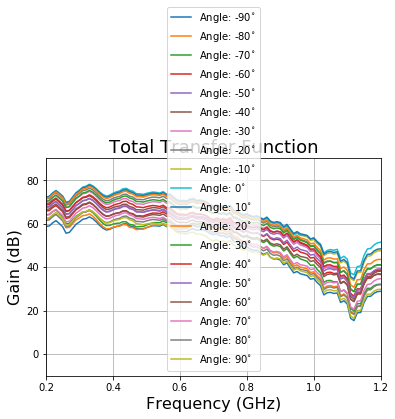

In [64]:
Ant=np.loadtxt('AntennaTransfer.txt') 
ant_freq=Ant[:,0] 
ant_amp=Ant[:,1]



elec_func= interp1d(ant_freq,ant_amp)

fnew=np.linspace(.20,1.200,101)

elecdB=elec_func(fnew)

#plt.plot(fnew,elecdB)






freq = fft.fftfreq(N, dt)

dB=10*np.log10(abs(fshift))


ant_func= interp1d(fft.fftshift(freq)[530:638], dB[530:638])

fnew=np.linspace(.20,1.200,101)

dB=ant_func(fnew)




f=[.200,.450,.700,.950,1.200]
A=[angle_minus_90, angle_minus_80, angle_minus_70, angle_minus_60, angle_minus_50, angle_minus_40, angle_minus_30, angle_minus_20, angle_minus_10, angle_0, angle_10, angle_20, angle_30, angle_40, angle_50, angle_60, angle_70, angle_80, angle_90]
name=['-90', '-80', '-70', '-60', '-50', '-40', '-30', '-20', '-10', '0', '10', '20', '30', '40', '50', '60', '70', '80', '90']

for i in range(len(A)):
  
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,101)
    
    Hloss=dB+g(fnew)
    
    Final_Transfer=[]
    
    for j in range(len(Hloss)):
        Final_Transfer.append(Hloss[j]+elecdB[j])
        
    
    plt.plot(fnew,Final_Transfer,label='Angle: '+name[i]+'$^{\circ}$')
    
    
    
   
    
    
    
    plt.grid(True)
    plt.ylim(-10,90) 
    plt.xlim(0.2,1.2)
    plt.legend(loc='best')
    plt.title('Total Transfer Function', fontsize=18)
    plt.ylabel('Gain (dB)', fontsize=16)
    plt.xlabel('Frequency (GHz)', fontsize=16)





25363.9778651
25363.9778651


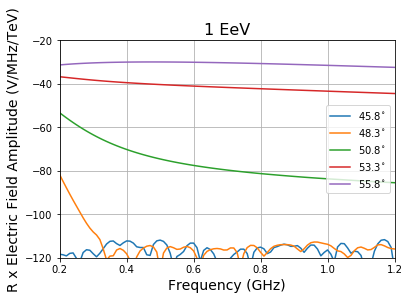

In [65]:
names=['/home/donald/shower_45.8_9.dat','/home/donald/shower_48.3_9.dat','/home/donald/shower_50.8_9.dat','/home/donald/shower_53.3_9.dat','/home/donald/shower_55.8_9.dat']
title=['45.8$^{\circ}$','48.3$^{\circ}$','50.8$^{\circ}$','53.3$^{\circ}$','55.8$^{\circ}$']

for i in range(len(names)):
    A=np.loadtxt(names[i])

    x=A[:,0]
    
    #for i in range(len(x)):
     #   x[i]*=10**3
    y=A[:,1]

    #plt.plot(x,y)
    #plt.xlim(900)

    N=len(x)
    dt=x[1]-x[0]
    
    #dt=0.04
    #dt=0.00
    NFFT=100*N
    f = fft.fft(y, N)
    fshift = fft.fftshift(f)
#pyp.plot(abs(f*f))



    freq = fft.fftfreq(N, dt)
    df=freq[1]-freq[0]
    

    

    
    
    plt.figure(0)
    
    g = interp1d(fft.fftshift(freq)*3, 10*np.log10(10**(-4)*1000*abs(fshift)*dt*1e3/(N)))
    fnew=np.linspace(.200,1.200,101)
    
    
    angles=['/home/donald/minus90.txt','minus80.txt','minus70.txt','minus60.txt','minus50.txt','minus40.txt','minus30.txt','minus20.txt','minus10.txt','zero.txt','plus10.txt','plus20.txt','plus30.txt','plus40.txt','plus50.txt','plus60.txt','plus70.txt','plus80.txt','plus90.txt',]
    name=['-90', '-80', '-70', '-60', '-50', '-40', '-30', '-20', '-10', '0', '10', '20', '30', '40', '50', '60', '70', '80', '90']


    fnew=np.linspace(.200,1.200,101)




    
    
    
    plt.plot(fnew,g(fnew),label=title[i])
    
    
    
    #plt.ylim(10**(-6),10**(-2))
    #plt.xlim(10**(-3),10**(0.4))
    plt.xlim(.2,1.2)
    plt.ylim(-120,-20)
    plt.xlabel('Frequency (GHz)',fontsize=14)
    plt.ylabel('R x Electric Field Amplitude (V/MHz/TeV)',fontsize=14)
    plt.legend(loc='best')
    plt.title('1 EeV',fontsize=16)
    plt.grid(True, which='both')
    
parseval_sx = np.sum(10**3*y**2*dt*1e3)
print(parseval_sx)

parseval_fx = np.sum(1000*abs(fshift**2)*dt*1e3/(N))
print(parseval_fx)

In [66]:
 A=np.loadtxt('minus50.txt',delimiter=',',unpack=True)
    
print(A)

[ 67.64653928  67.89409408  69.27641457  70.24311899  68.83372477
  67.34335232  64.33596799  64.65388197  66.50227109  68.31897671
  69.3181024   70.52341677  70.7823453   71.55210694  70.6301784
  69.23194357  67.56896365  66.19858777  65.30593502  65.52721869
  66.24862203  66.76105568  67.01944927  67.8160194   67.89526062
  66.85034222  66.44491542  65.36640373  65.36737711  65.15592859
  65.65767631  66.06499741  66.36603449  66.23585275  65.99950663
  66.69071304  65.63761589  65.73058454  64.4861071   63.28769139
  62.80301682  62.95109878  62.74254399  63.64955497  63.97693284
  63.16192036  63.36642016  63.07139114  62.53562574  61.35478485
  60.78950411  61.48868227  60.75955636  61.23843769  60.64984549
  61.66009619  59.55541067  59.34623465  58.41843026  57.68128862
  58.29466481  57.52956667  57.24785249  57.67385851  56.9174377
  56.2971798   57.36555738  55.65934787  55.08925067  55.55090463
  55.21799775  53.36022339  54.57492955  52.4830917   50.58211463
  51.5341962

/home/donald/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


25363.9778651
25363.9778651


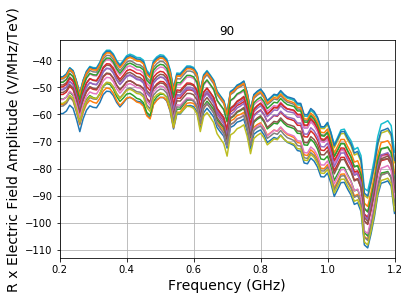

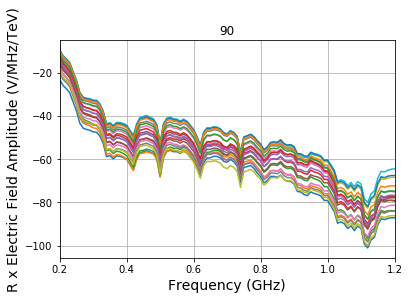

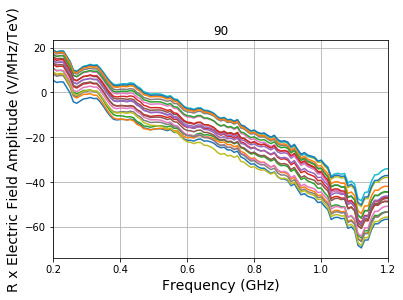

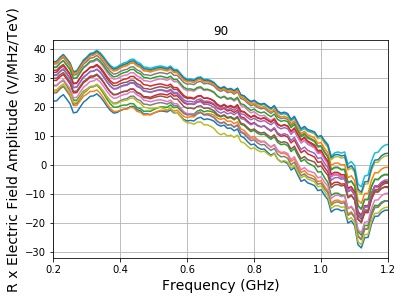

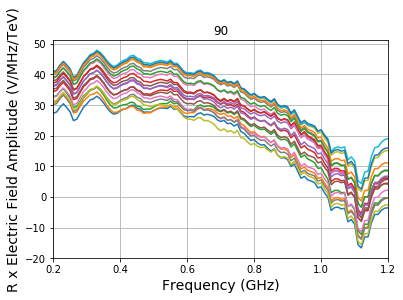

In [67]:
names=['/home/donald/shower_45.8_9.dat','/home/donald/shower_48.3_9.dat','/home/donald/shower_50.8_9.dat','/home/donald/shower_53.3_9.dat','/home/donald/shower_55.8_9.dat']
title=['45.8$^{\circ}$','48.3$^{\circ}$','50.8$^{\circ}$','53.3$^{\circ}$','55.8$^{\circ}$']

for i in range(len(names)):
    A=np.loadtxt(names[i])

    x=A[:,0]
    
    #for i in range(len(x)):
     #   x[i]*=10**3
    y=A[:,1]

    #plt.plot(x,y)
    #plt.xlim(900)

    N=len(x)
    dt=x[1]-x[0]
    
    #dt=0.04
    #dt=0.00
    NFFT=100*N
    f = fft.fft(y, N)
    fshift = fft.fftshift(f)
#pyp.plot(abs(f*f))



    freq = fft.fftfreq(N, dt)
    df=freq[1]-freq[0]
    

    

    
    
    plt.figure(i)
    
    g = interp1d(fft.fftshift(freq)*3, 10*np.log10(10**(-4)*1000*abs(fshift)*dt*1e3/(N)))
    fnew=np.linspace(.200,1.200,101)
    
    
    angles=['/home/donald/minus90.txt','minus80.txt','minus70.txt','minus60.txt','minus50.txt','minus40.txt','minus30.txt','minus20.txt','minus10.txt','zero.txt','plus10.txt','plus20.txt','plus30.txt','plus40.txt','plus50.txt','plus60.txt','plus70.txt','plus80.txt','plus90.txt',]
    name=['-90', '-80', '-70', '-60', '-50', '-40', '-30', '-20', '-10', '0', '10', '20', '30', '40', '50', '60', '70', '80', '90']


    fnew=np.linspace(.200,1.200,101)



    for i in range(len(angles)):
        
        title=['45.8$^{\circ}$','48.3$^{\circ}$','50.8$^{\circ}$','53.3$^{\circ}$','55.8$^{\circ}$']

    
        A=np.loadtxt(angles[i],delimiter=',',unpack=True)
    
       
        plt.title(name[i])
    

    
        plt.plot(fnew,A+g(fnew))
        plt.legend(loc='best')
        plt.grid(True)
        #plt.ylim(0,80) 
        plt.xlim(0.2,1.2)
        plt.legend(loc='best')
        #plt.title('Total Transfer Function', fontsize=18)
        plt.ylabel('Gain (dB)', fontsize=16)
        plt.xlabel('Frequency (GHz)', fontsize=16)
       
    
    
    

    
    
    
  
    plt.xlim(.2,1.2)
    #plt.ylim(-120,-20)
    plt.xlabel('Frequency (GHz)',fontsize=14)
    plt.ylabel('R x Electric Field Amplitude (V/MHz/TeV)',fontsize=14)
    plt.legend(loc='best')
    #plt.title('1 EeV',fontsize=16)
    plt.grid(True, which='both')
    
parseval_sx = np.sum(10**3*y**2*dt*1e3)
print(parseval_sx)

parseval_fx = np.sum(1000*abs(fshift**2)*dt*1e3/(N))
print(parseval_fx)

In [68]:
#N=len(time);
#dt=time[1]-time[0]

#f = fft.fft(amp)
#fshift = fft.fftshift(f)


freq = fft.fftfreq(N, dt)

dB=10*np.log10(abs(fshift*fshift))


ant_func= interp1d(fft.fftshift(freq)[532:636], dB[532:636])

fnew=np.linspace(.20,1.200,101)

dB=ant_func(fnew)


f=[.200,.450,.700,.950,1.200]
#A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
#name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']

A=[angle_minus_90,angle_minus_60,angle_minus_30,angle_0,angle_30,angle_60,angle_90]

#A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
#name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']
name=['-90','-60','-30','0','30','60','90']


for i in range(len(A)):
    #plt.figure(i)
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,101)
    
    Hloss=dB+g(fnew)

    plt.plot(fnew,Hloss,label=name[i])
    
    
    
    plt.title('Antenna Transfer Function')
    plt.ylabel('Gain (dB)')
    plt.xlabel('Frequency (GHz)')
    plt.xlim(0.2,1.2)
    plt.legend(loc='best')
    plt.grid(True)
#plt.figure(2)
#plt.plot(fnew,dB[533:634])


#print(fnew)
#print(len(fnew))

#print(fft.fftshift(freq)[533:634])
#print(len(fft.fftshift(freq)[533:634]))




ValueError: A value in x_new is above the interpolation range.

In [ ]:
names=['/home/donald/shower_45.8_9.dat','/home/donald/shower_48.3_9.dat','/home/donald/shower_50.8_9.dat','/home/donald/shower_53.3_9.dat','/home/donald/shower_55.8_9.dat']
title=['45.8$^{\circ}$','48.3$^{\circ}$','50.8$^{\circ}$','53.3$^{\circ}$','55.8$^{\circ}$']

for i in range(len(names)):
    A=np.loadtxt(names[i])

    x=A[:,0]
    
    #for i in range(len(x)):
     #   x[i]*=10**3
    y=A[:,1]

    #plt.plot(x,y)
    #plt.xlim(900)

    N=len(x)
    dt=x[1]-x[0]
    
    #dt=0.04
    #dt=0.00
    NFFT=100*N
    f = fft.fft(y, N)
    fshift = fft.fftshift(f)
#pyp.plot(abs(f*f))



    freq = fft.fftfreq(N, dt)
    df=freq[1]-freq[0]
    

    

    
    
    plt.figure(i)
    plt.title(title[i],fontsize=18)
    g = interp1d(fft.fftshift(freq)*3, 10*np.log10(10**(-4)*1000*abs(fshift)*dt*1e3/(N)))
    fnew=np.linspace(.200,1.200,101)
    
    
    angles=['/home/donald/minus90.txt','minus80.txt','minus70.txt','minus60.txt','minus50.txt','minus40.txt','minus30.txt','minus20.txt','minus10.txt','zero.txt','plus10.txt','plus20.txt','plus30.txt','plus40.txt','plus50.txt','plus60.txt','plus70.txt','plus80.txt','plus90.txt',]
    name=['-90', '-80', '-70', '-60', '-50', '-40', '-30', '-20', '-10', '0', '10', '20', '30', '40', '50', '60', '70', '80', '90']


    fnew=np.linspace(.200,1.200,101)



    for j in range(len(angles)):
        
        title=['45.8$^{\circ}$','48.3$^{\circ}$','50.8$^{\circ}$','53.3$^{\circ}$','55.8$^{\circ}$']

    
        A=np.loadtxt(angles[j],delimiter=',',unpack=True)
    
       
        

    
        plt.plot(fnew,A+g(fnew),label=name[j])
        plt.legend(loc='best')
        plt.grid(True)
        #plt.ylim(0,80) 
        plt.xlim(0.2,1.2)
        plt.legend(loc='best')
        #plt.title('Total Transfer Function', fontsize=18)
        plt.ylabel('Gain (dB)', fontsize=16)
        plt.xlabel('Frequency (GHz)', fontsize=16)
        plt.legend(loc='right',bbox_to_anchor=(1.2,0.45))
    
    
    

    
    
    
  
    plt.xlim(.2,1.2)
    #plt.ylim(-120,-20)
    plt.xlabel('Frequency (GHz)',fontsize=14)
    plt.ylabel('R x Electric Field Amplitude (V/MHz/TeV)',fontsize=14)
   
    #plt.title('1 EeV',fontsize=16)
    plt.grid(True, which='both')
    
parseval_sx = np.sum(10**3*y**2*dt*1e3)
print(parseval_sx)

parseval_fx = np.sum(1000*abs(fshift**2)*dt*1e3/(N))
print(parseval_fx)

In [ ]:
#N=len(time);
#dt=time[1]-time[0]

#f = fft.fft(amp)
#fshift = fft.fftshift(f)


freq = fft.fftfreq(N, dt)

dB=10*np.log10(abs(fshift*fshift))


ant_func= interp1d(fft.fftshift(freq)[532:636], dB[532:636])

fnew=np.linspace(.20,1.200,101)

dB=ant_func(fnew)


f=[.200,.450,.700,.950,1.200]
#A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
#name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']

A=[angle_minus_90,angle_minus_60,angle_minus_30,angle_0,angle_30,angle_60,angle_90]

#A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
#name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']
name=['-90','-60','-30','0','30','60','90']


for i in range(len(A)):
    #plt.figure(i)
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,101)
    
    Hloss=dB+g(fnew)

    plt.plot(fnew,Hloss,label=name[i])
    
    
    
    plt.title('Antenna Transfer Function')
    plt.ylabel('Gain (dB)')
    plt.xlabel('Frequency (GHz)')
    plt.xlim(0.2,1.2)
    plt.legend(loc='best')
    plt.grid(True)
#plt.figure(2)
#plt.plot(fnew,dB[533:634])


#print(fnew)
#print(len(fnew))

#print(fft.fftshift(freq)[533:634])
#print(len(fft.fftshift(freq)[533:634]))


